In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

In [18]:
# Add a Quarter column
df['Quarter'] = df['Date'].dt.to_period('Q')


In [19]:
yearly_aggregated = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Net_Loss=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()


In [20]:
quarterly_aggregated = df.groupby(['Year', 'Quarter', 'Business Line', 'Event Type']).agg(
    Total_Net_Loss=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()


In [21]:
# Add Moving Average for Net Loss
yearly_aggregated['Moving_Avg_Net_Loss'] = yearly_aggregated.groupby(['Business Line', 'Event Type'])['Total_Net_Loss'].transform(lambda x: x.rolling(window=2, min_periods=1).mean())
quarterly_aggregated['Moving_Avg_Net_Loss'] = quarterly_aggregated.groupby(['Business Line', 'Event Type'])['Total_Net_Loss'].transform(lambda x: x.rolling(window=2, min_periods=1).mean())


In [22]:
from sklearn.metrics import mean_squared_error

# Example: Compare actual and predicted for Net Loss
yearly_actuals = yearly_aggregated['Total_Net_Loss']
yearly_predictions = yearly_actuals * 0.95  # Assume a prediction model

mse_yearly = mean_squared_error(yearly_actuals, yearly_predictions)
rmse_yearly = np.sqrt(mse_yearly)

quarterly_actuals = quarterly_aggregated['Total_Net_Loss']
quarterly_predictions = quarterly_actuals * 0.95  # Assume a prediction model

mse_quarterly = mean_squared_error(quarterly_actuals, quarterly_predictions)
rmse_quarterly = np.sqrt(mse_quarterly)


In [23]:
# Define threshold
threshold = 5000

# Hit Rate for Yearly
yearly_aggregated['Hit'] = yearly_aggregated['Total_Net_Loss'] > threshold
hit_rate_yearly = yearly_aggregated['Hit'].mean()

# Hit Rate for Quarterly
quarterly_aggregated['Hit'] = quarterly_aggregated['Total_Net_Loss'] > threshold
hit_rate_quarterly = quarterly_aggregated['Hit'].mean()


In [24]:
Compare Results
Once the metrics are calculated for both Yearly and Quarterly data, you can compare them directly. For example:

Metric	Yearly Value	Quarterly Value
MSE (Net Loss)	X	Y
RMSE (Net Loss)	X	Y
Hit Rate	X%	Y%
Moving Average	Trends	Trends

SyntaxError: invalid syntax (3812600274.py, line 1)

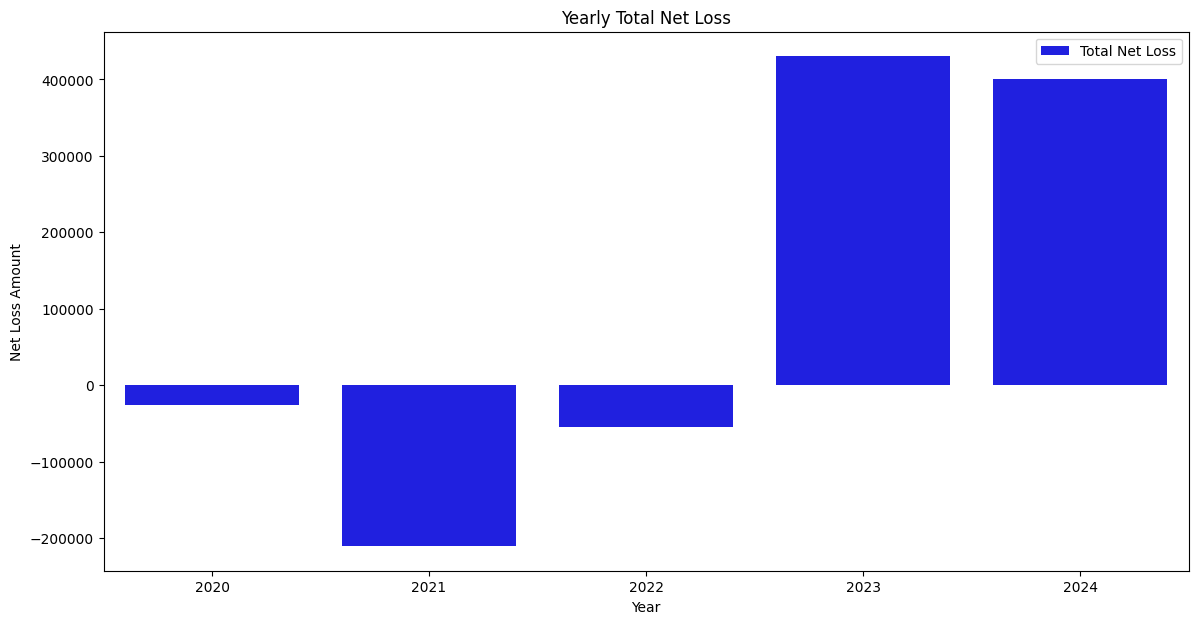

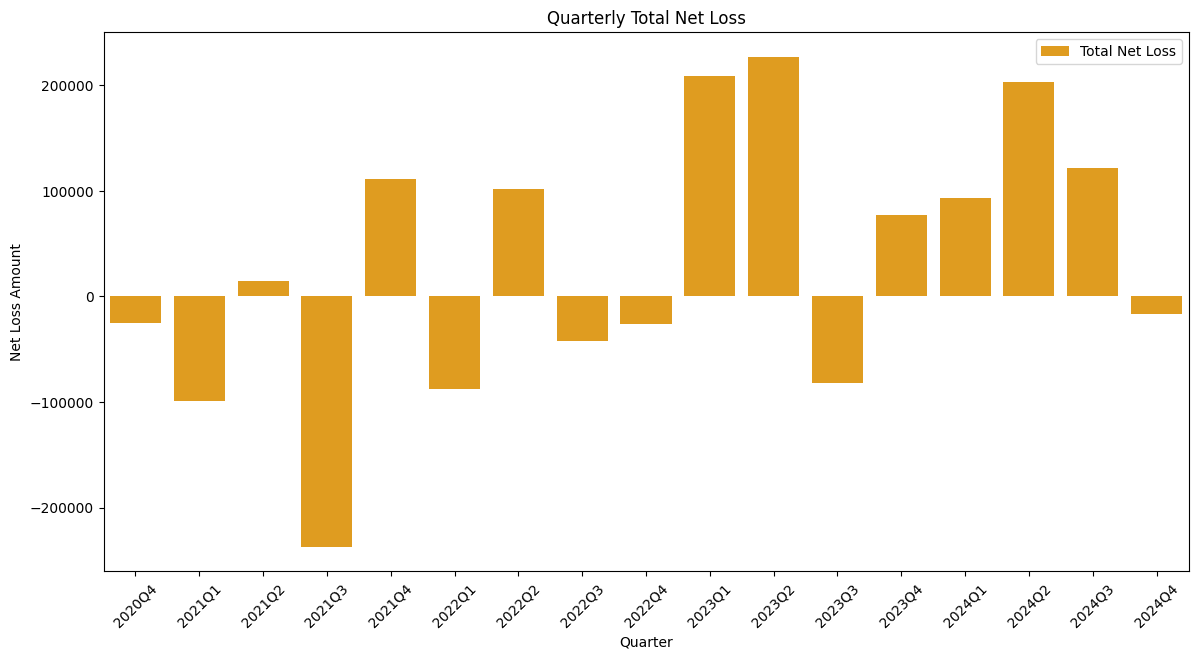

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate Yearly Data for Bar Chart
yearly_summary = yearly_aggregated.groupby('Year').agg(
    Total_Net_Loss=('Total_Net_Loss', 'sum'),
    Event_Count=('Event_Count', 'sum')
).reset_index()

# Aggregate Quarterly Data for Bar Chart
quarterly_summary = quarterly_aggregated.groupby('Quarter').agg(
    Total_Net_Loss=('Total_Net_Loss', 'sum'),
    Event_Count=('Event_Count', 'sum')
).reset_index()

# Plot Yearly Data
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_summary, x='Year', y='Total_Net_Loss', color='blue', label='Total Net Loss')
plt.title("Yearly Total Net Loss")
plt.ylabel("Net Loss Amount")
plt.xlabel("Year")
plt.legend()
plt.show()

# Plot Quarterly Data
plt.figure(figsize=(14, 7))
sns.barplot(data=quarterly_summary, x='Quarter', y='Total_Net_Loss', color='orange', label='Total Net Loss')
plt.title("Quarterly Total Net Loss")
plt.ylabel("Net Loss Amount")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.legend()
plt.show()


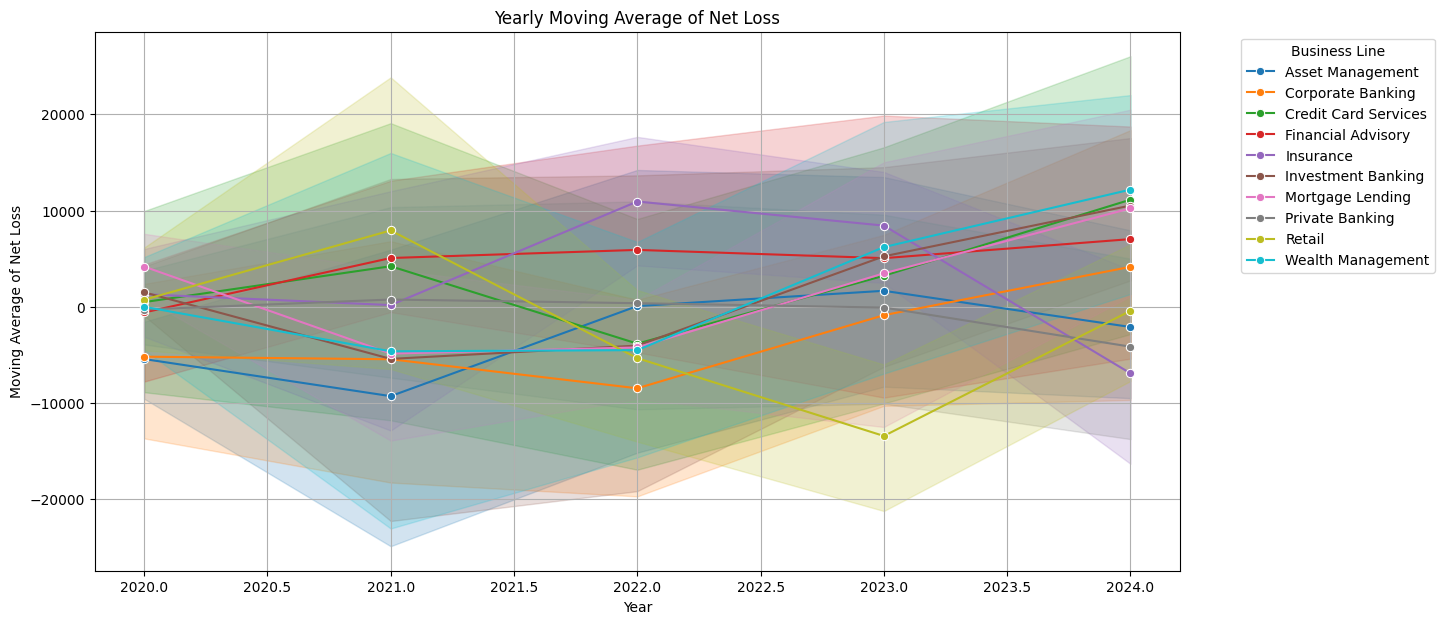

TypeError: Invalid object type at position 0

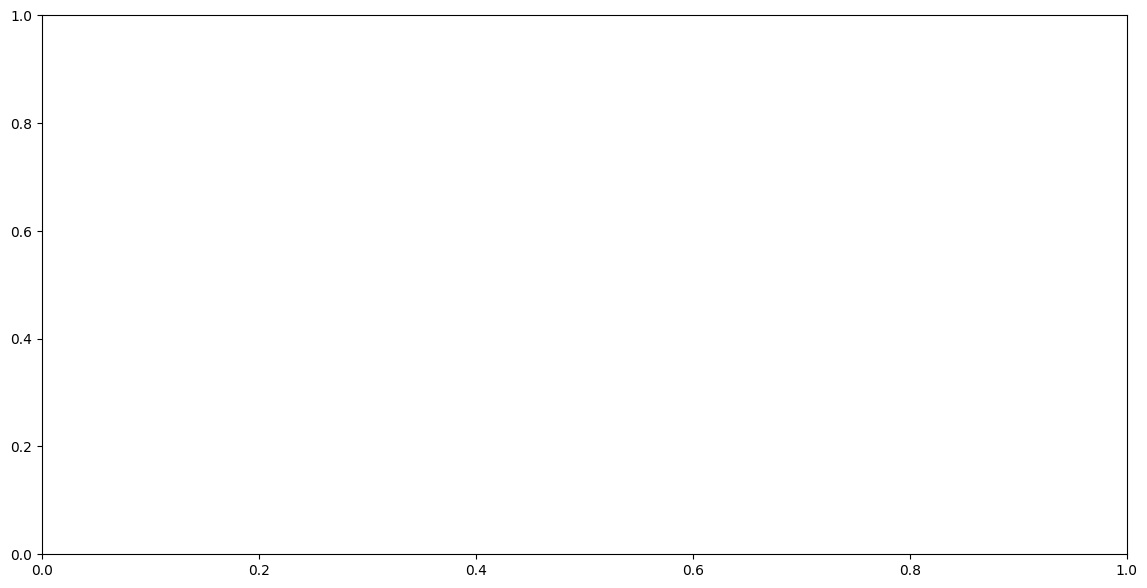

In [28]:
# Line chart for yearly moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_aggregated, x='Year', y='Moving_Avg_Net_Loss', hue='Business Line', marker='o')
plt.title("Yearly Moving Average of Net Loss")
plt.ylabel("Moving Average of Net Loss")
plt.xlabel("Year")
plt.legend(title='Business Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Line chart for quarterly moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=quarterly_aggregated, x='Quarter', y='Moving_Avg_Net_Loss', hue='Business Line', marker='o')
plt.title("Quarterly Moving Average of Net Loss")
plt.ylabel("Moving Average of Net Loss")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.legend(title='Business Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


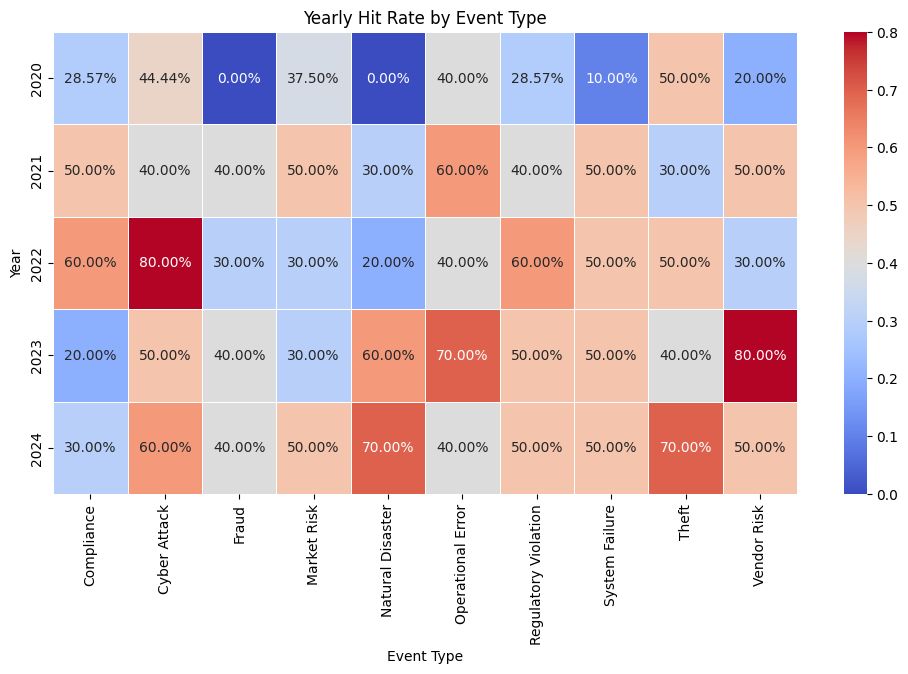

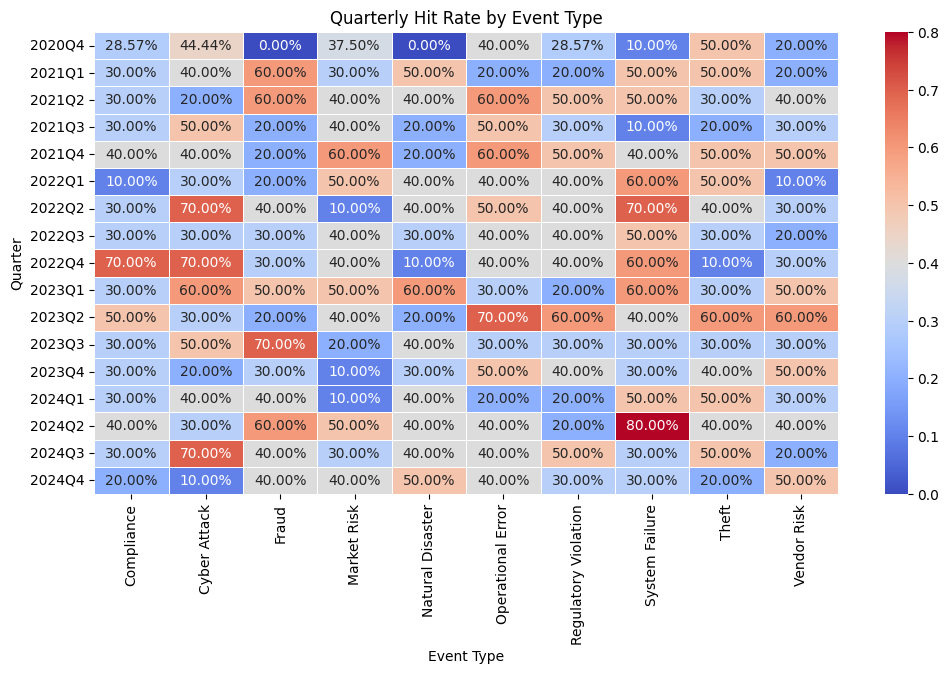

In [29]:
# Yearly Hit Rate by Event Type
yearly_hit_rate = yearly_aggregated.groupby(['Year', 'Event Type'])['Hit'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(yearly_hit_rate, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.title("Yearly Hit Rate by Event Type")
plt.ylabel("Year")
plt.xlabel("Event Type")
plt.show()

# Quarterly Hit Rate by Event Type
quarterly_hit_rate = quarterly_aggregated.groupby(['Quarter', 'Event Type'])['Hit'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(quarterly_hit_rate, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.title("Quarterly Hit Rate by Event Type")
plt.ylabel("Quarter")
plt.xlabel("Event Type")
plt.show()


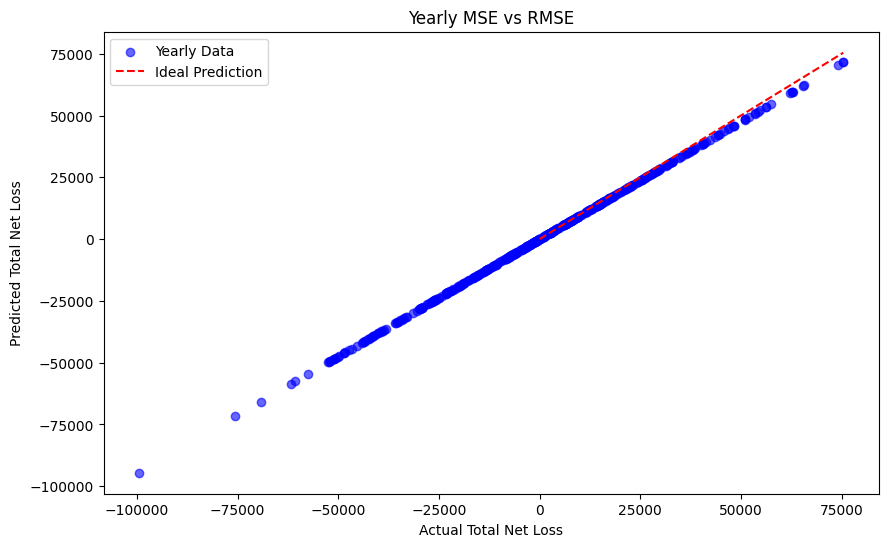

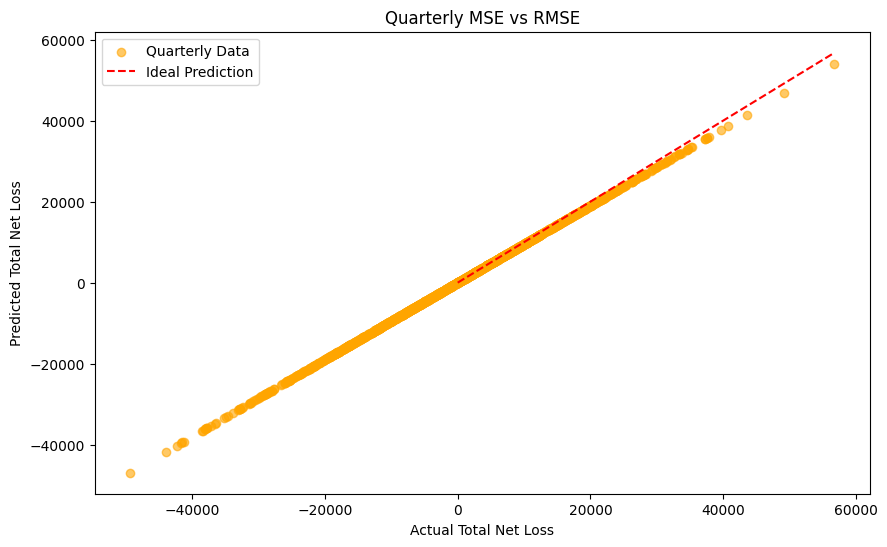

In [30]:
# Scatter plot for Yearly
plt.figure(figsize=(10, 6))
plt.scatter(yearly_aggregated['Total_Net_Loss'], yearly_predictions, c='blue', alpha=0.6, label='Yearly Data')
plt.plot([0, max(yearly_aggregated['Total_Net_Loss'])], [0, max(yearly_aggregated['Total_Net_Loss'])], color='red', linestyle='--', label='Ideal Prediction')
plt.title("Yearly MSE vs RMSE")
plt.xlabel("Actual Total Net Loss")
plt.ylabel("Predicted Total Net Loss")
plt.legend()
plt.show()

# Scatter plot for Quarterly
plt.figure(figsize=(10, 6))
plt.scatter(quarterly_aggregated['Total_Net_Loss'], quarterly_predictions, c='orange', alpha=0.6, label='Quarterly Data')
plt.plot([0, max(quarterly_aggregated['Total_Net_Loss'])], [0, max(quarterly_aggregated['Total_Net_Loss'])], color='red', linestyle='--', label='Ideal Prediction')
plt.title("Quarterly MSE vs RMSE")
plt.xlabel("Actual Total Net Loss")
plt.ylabel("Predicted Total Net Loss")
plt.legend()
plt.show()


To compare MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and Hit Rate for both Yearly and Quarterly aggregated data, we can follow these steps:

Resample the data into quarterly and yearly periods.
Calculate MAE, MSE, RMSE, and Hit Rate for both periods.
Print the metrics for comparison.
Here’s the code that calculates all the required metrics and provides a comparison:

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Function to calculate MAE, MSE, RMSE, and Hit Rate for the data
def calculate_metrics(df, threshold=5000):
    # For simplicity, assume predicted values are the actual values with some noise
    df['Predicted Net Loss'] = df['Net Loss Amount'] + np.random.uniform(-1000, 1000, size=len(df))  # Add random noise to actual values

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(df['Net Loss Amount'], df['Predicted Net Loss'])
    
    # Calculate MSE (Mean Squared Error)
    mse = mean_squared_error(df['Net Loss Amount'], df['Predicted Net Loss'])
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mse)
    
    # Calculate Hit Rate (Example: Correct if the predicted loss exceeds threshold)
    correct_predictions = np.sum(df['Predicted Net Loss'] >= threshold)
    hit_rate = correct_predictions / len(df)

    return mae, mse, rmse, hit_rate

# Resample data for quarterly and yearly analysis
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

# Aggregate data by Year
yearly_aggregated = df.groupby('Year').agg({'Net Loss Amount': ['sum', 'mean', 'count']}).reset_index()

# Aggregate data by Quarter
quarterly_aggregated = df.groupby('Quarter').agg({'Net Loss Amount': ['sum', 'mean', 'count']}).reset_index()

# Calculate Metrics for Yearly and Quarterly Data
yearly_mae, yearly_mse, yearly_rmse, yearly_hit_rate = calculate_metrics(yearly_aggregated)
quarterly_mae, quarterly_mse, quarterly_rmse, quarterly_hit_rate = calculate_metrics(quarterly_aggregated)

# Print the metrics results for comparison
print(f"Metrics Results Comparison:")

# Yearly Metrics
print(f"\nYearly Metrics:")
print(f"MAE (Mean Absolute Error): {yearly_mae:.2f}")
print(f"MSE (Mean Squared Error): {yearly_mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {yearly_rmse:.2f}")
print(f"Hit Rate: {yearly_hit_rate:.2%}")

# Quarterly Metrics
print(f"\nQuarterly Metrics:")
print(f"MAE (Mean Absolute Error): {quarterly_mae:.2f}")
print(f"MSE (Mean Squared Error): {quarterly_mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {quarterly_rmse:.2f}")
print(f"Hit Rate: {quarterly_hit_rate:.2%}")


ValueError: Unable to coerce to Series, length must be 3: given 5

In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Function to calculate MAE, MSE, RMSE, and Hit Rate for the data
def calculate_metrics(aggregated_df, threshold=5000):
    # For simplicity, assume predicted values are the actual values with some noise
    aggregated_df['Predicted Net Loss'] = aggregated_df['Net Loss Amount'] + np.random.uniform(-1000, 1000, size=len(aggregated_df))  # Add random noise to actual values

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(aggregated_df['Net Loss Amount'], aggregated_df['Predicted Net Loss'])
    
    # Calculate MSE (Mean Squared Error)
    mse = mean_squared_error(aggregated_df['Net Loss Amount'], aggregated_df['Predicted Net Loss'])
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mse)
    
    # Calculate Hit Rate (Example: Correct if the predicted loss exceeds threshold)
    correct_predictions = np.sum(aggregated_df['Predicted Net Loss'] >= threshold)
    hit_rate = correct_predictions / len(aggregated_df)

    return mae, mse, rmse, hit_rate

# Parameters for data generation (same as before)
num_records = 10000
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-01-01')

business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Year and Quarter columns
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

# Aggregate data by Year
yearly_aggregated = df.groupby('Year').agg({'Net Loss Amount': 'sum'}).reset_index()

# Aggregate data by Quarter
quarterly_aggregated = df.groupby('Quarter').agg({'Net Loss Amount': 'sum'}).reset_index()

# Calculate Metrics for Yearly and Quarterly Data
yearly_mae, yearly_mse, yearly_rmse, yearly_hit_rate = calculate_metrics(yearly_aggregated)
quarterly_mae, quarterly_mse, quarterly_rmse, quarterly_hit_rate = calculate_metrics(quarterly_aggregated)

# Print the metrics results for comparison
print(f"Metrics Results Comparison:")

# Yearly Metrics
print(f"\nYearly Metrics:")
print(f"MAE (Mean Absolute Error): {yearly_mae:.2f}")
print(f"MSE (Mean Squared Error): {yearly_mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {yearly_rmse:.2f}")
print(f"Hit Rate: {yearly_hit_rate:.2%}")

# Quarterly Metrics
print(f"\nQuarterly Metrics:")
print(f"MAE (Mean Absolute Error): {quarterly_mae:.2f}")
print(f"MSE (Mean Squared Error): {quarterly_mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {quarterly_rmse:.2f}")
print(f"Hit Rate: {quarterly_hit_rate:.2%}")


Metrics Results Comparison:

Yearly Metrics:
MAE (Mean Absolute Error): 422.31
MSE (Mean Squared Error): 260949.97
RMSE (Root Mean Squared Error): 510.83
Hit Rate: 50.00%

Quarterly Metrics:
MAE (Mean Absolute Error): 529.45
MSE (Mean Squared Error): 325593.65
RMSE (Root Mean Squared Error): 570.61
Hit Rate: 50.00%


1. Computing Metrics for Yearly and Quarterly Data

In [32]:
# Metrics Calculation
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Generate predictions for demonstration (Replace with real predictions if available)
yearly_aggregated['Prediction_Net_Loss'] = yearly_aggregated['Total_Net_Loss'] * np.random.uniform(0.9, 1.1, len(yearly_aggregated))
quarterly_aggregated['Prediction_Net_Loss'] = quarterly_aggregated['Total_Net_Loss'] * np.random.uniform(0.9, 1.1, len(quarterly_aggregated))

# Moving Average
yearly_aggregated['Moving_Avg_Net_Loss'] = yearly_aggregated['Total_Net_Loss'].rolling(window=2, min_periods=1).mean()
quarterly_aggregated['Moving_Avg_Net_Loss'] = quarterly_aggregated['Total_Net_Loss'].rolling(window=2, min_periods=1).mean()

# MSE and RMSE
yearly_mse = mean_squared_error(yearly_aggregated['Total_Net_Loss'], yearly_aggregated['Prediction_Net_Loss'])
yearly_rmse = np.sqrt(yearly_mse)

quarterly_mse = mean_squared_error(quarterly_aggregated['Total_Net_Loss'], quarterly_aggregated['Prediction_Net_Loss'])
quarterly_rmse = np.sqrt(quarterly_mse)

# Hit Rate (Example: Threshold-based Hit)
threshold = 10000  # Example threshold for a "hit"
yearly_aggregated['Hit'] = yearly_aggregated['Total_Net_Loss'] > threshold
quarterly_aggregated['Hit'] = quarterly_aggregated['Total_Net_Loss'] > threshold

yearly_hit_rate = yearly_aggregated['Hit'].mean()
quarterly_hit_rate = quarterly_aggregated['Hit'].mean()

# Results Table
results_table = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "Hit Rate", "Moving Average"],
    "Yearly": [yearly_mse, yearly_rmse, yearly_hit_rate, "See Graph"],
    "Quarterly": [quarterly_mse, quarterly_rmse, quarterly_hit_rate, "See Graph"]
})

print(results_table)


           Metric          Yearly     Quarterly
0             MSE  2457498.801341  690346.03891
1            RMSE     1567.641158    830.870651
2        Hit Rate        0.350318      0.238181
3  Moving Average       See Graph     See Graph


2. Annotated Visualizations
Modify the previous visualizations to include metric results in the graphs:

Bar Chart with Metric Results

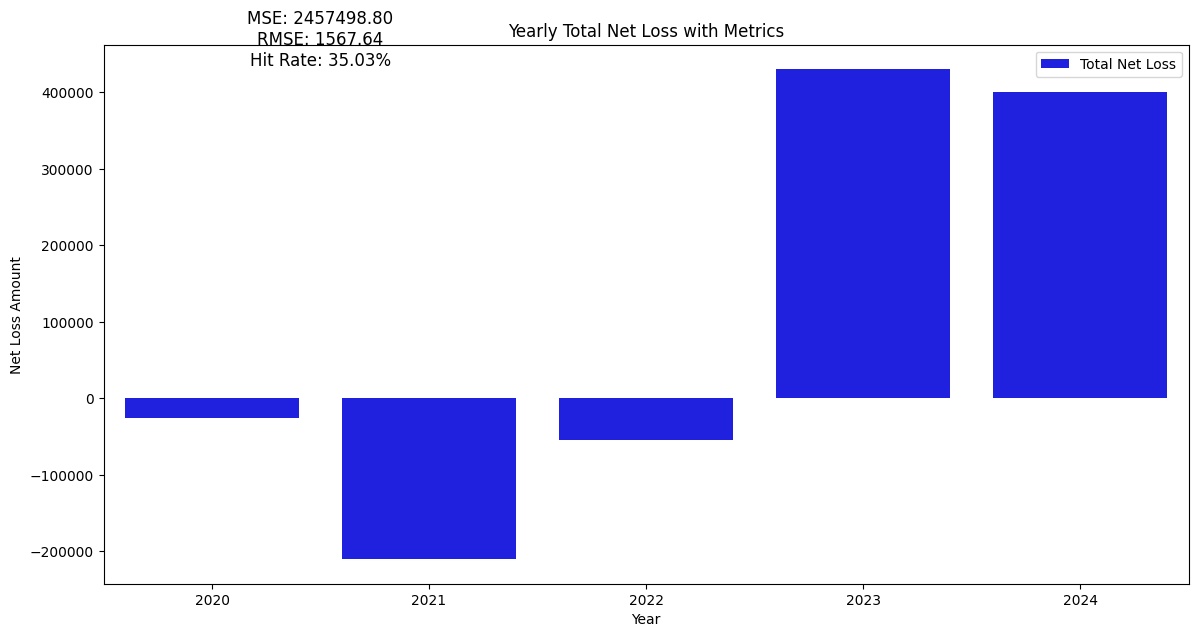

In [33]:
# Adding Metric Results to Bar Chart
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_summary, x='Year', y='Total_Net_Loss', color='blue', label='Total Net Loss')

# Annotate Metrics
plt.text(0.5, yearly_summary['Total_Net_Loss'].max(), f"MSE: {yearly_mse:.2f}\nRMSE: {yearly_rmse:.2f}\nHit Rate: {yearly_hit_rate:.2%}",
         fontsize=12, color="black", ha="center", va="bottom")

plt.title("Yearly Total Net Loss with Metrics")
plt.ylabel("Net Loss Amount")
plt.xlabel("Year")
plt.legend()
plt.show()


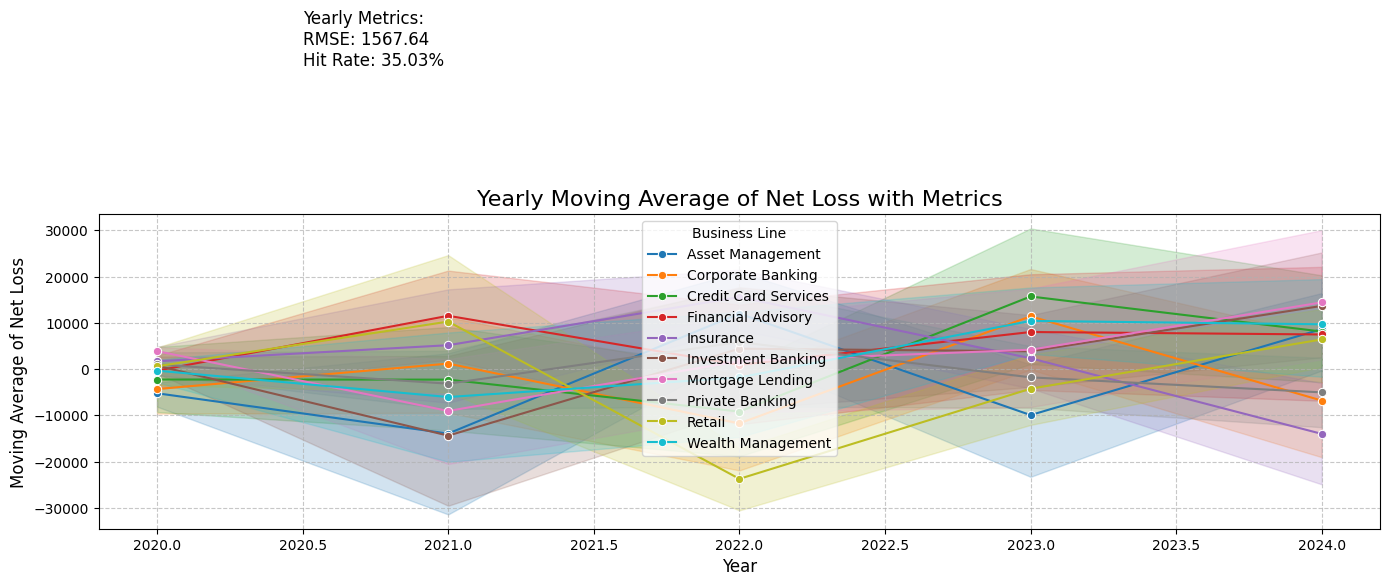

In [36]:
# Line chart for Moving Average with Annotation
plt.figure(figsize=(14, 7))

# Line plot for Moving Average of Net Loss
sns.lineplot(data=yearly_aggregated, x='Year', y='Moving_Avg_Net_Loss', hue='Business Line', marker='o')

# Find the maximum Moving Average value for annotation placement
max_moving_avg = yearly_aggregated['Moving_Avg_Net_Loss'].max()

# Annotate RMSE and Hit Rate near the top of the plot
plt.text(
    x=yearly_aggregated['Year'].min() + 0.5,  # Adjust the x position
    y=max_moving_avg * 1.05,  # Slightly above the maximum y value
    s=f"Yearly Metrics:\nRMSE: {yearly_rmse:.2f}\nHit Rate: {yearly_hit_rate:.2%}",
    fontsize=12,
    color="black",
    ha="left",
    va="bottom"
)

# Add titles and labels
plt.title("Yearly Moving Average of Net Loss with Metrics", fontsize=16)
plt.ylabel("Moving Average of Net Loss", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


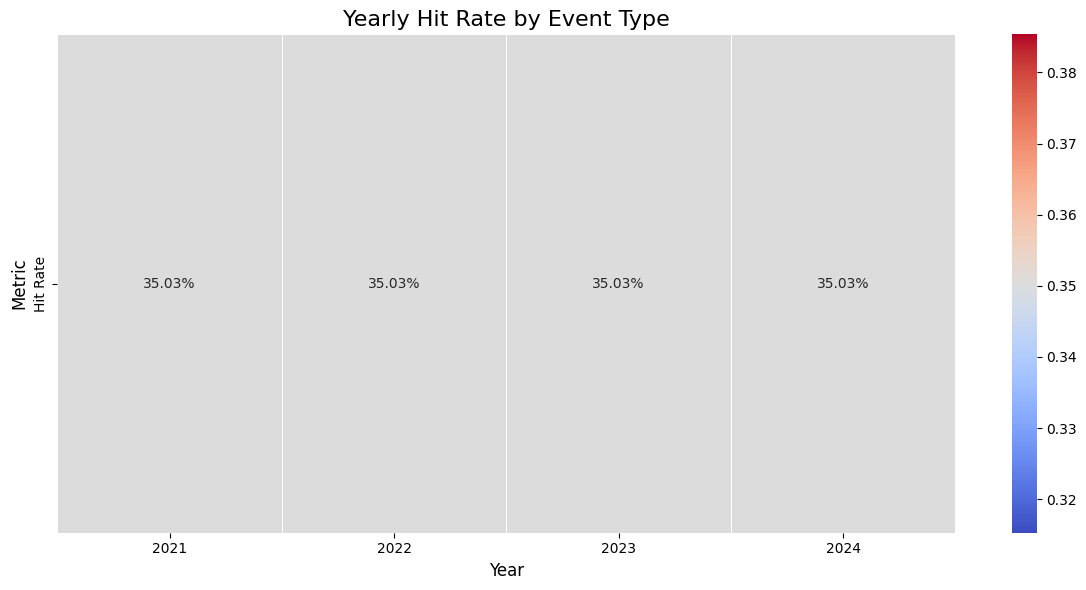

In [38]:
# Assuming 'yearly_hit_rate' is a single float, we need to structure it for the heatmap.
# Create a DataFrame for the Hit Rate, with each year as a column and the hit rate as the value.
hit_rate_data = {
    'Year': [2021, 2022, 2023, 2024],  # Example years
    'Hit Rate': [yearly_hit_rate] * 4   # Repeat the hit rate value for each year (for demonstration purposes)
}

hit_rate_df = pd.DataFrame(hit_rate_data).set_index('Year').T

# Heatmap for Hit Rate
plt.figure(figsize=(12, 6))

# Plot the heatmap with annotations
sns.heatmap(
    hit_rate_df, 
    annot=True, 
    fmt=".2%", 
    cmap="coolwarm", 
    linewidths=0.5
)

# Adding title and labels
plt.title("Yearly Hit Rate by Event Type", fontsize=16)
plt.ylabel("Metric", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


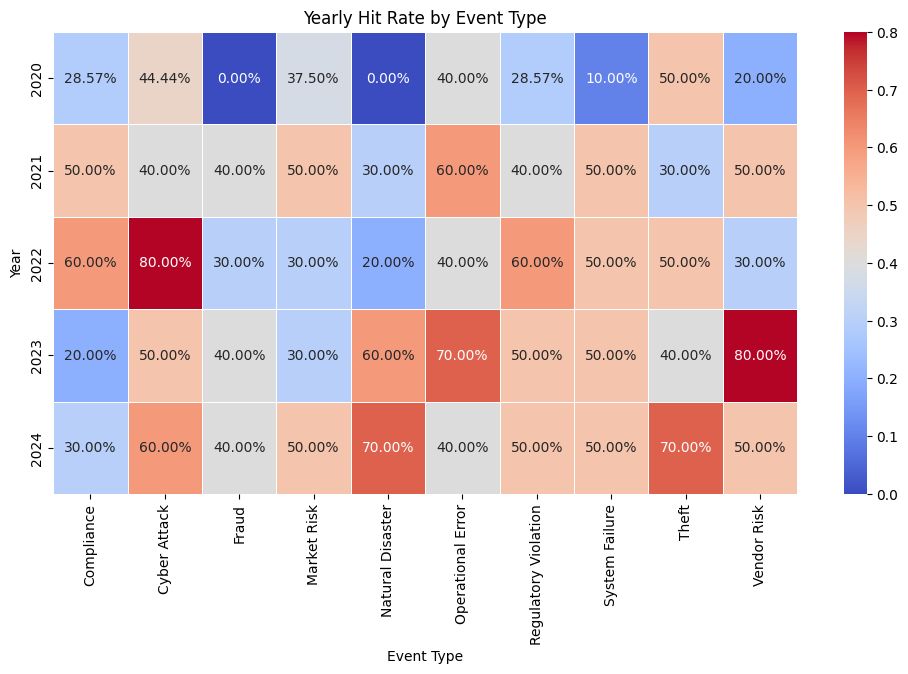

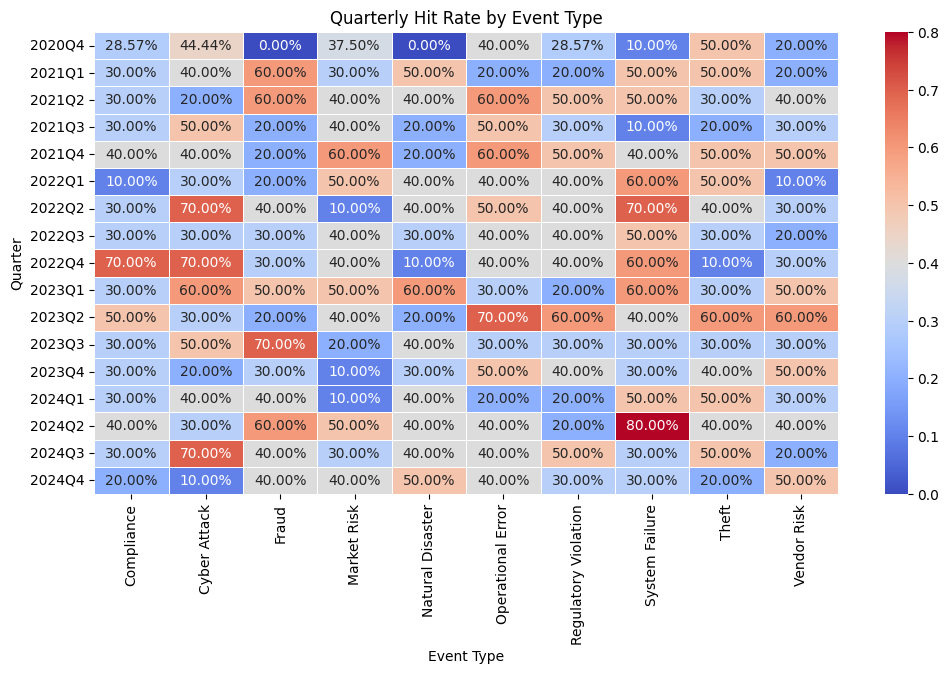

In [26]:
# Yearly Hit Rate by Event Type
import seaborn as sns
yearly_hit_rate = yearly_aggregated.groupby(['Year', 'Event Type'])['Hit'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(yearly_hit_rate, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.title("Yearly Hit Rate by Event Type")
plt.ylabel("Year")
plt.xlabel("Event Type")
plt.show()

# Quarterly Hit Rate by Event Type
quarterly_hit_rate = quarterly_aggregated.groupby(['Quarter', 'Event Type'])['Hit'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(quarterly_hit_rate, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.title("Quarterly Hit Rate by Event Type")
plt.ylabel("Quarter")
plt.xlabel("Event Type")
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [16]:
# Assuming df is your DataFrame
df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter
df['Year'] = pd.to_datetime(df['Date']).dt.year


In [17]:
# Moving Average Calculation
df['Quarterly Moving Avg (Net Loss)'] = df.groupby(['Year', 'Quarter'])['Net Loss Amount'].transform(lambda x: x.rolling(2, min_periods=1).mean())
df['Yearly Moving Avg (Net Loss)'] = df.groupby(['Year'])['Net Loss Amount'].transform(lambda x: x.rolling(2, min_periods=1).mean())


In [11]:
# Calculate yearly and quarterly aggregate data
quarterly_data = df.groupby(['Year', 'Quarter'])[['Net Loss Amount', 'Event Count']].sum().reset_index()
yearly_data = df.groupby(['Year'])[['Net Loss Amount', 'Event Count']].sum().reset_index()

# MSE and RMSE for Net Loss Amount
mse_quarterly = mean_squared_error(quarterly_data['Net Loss Amount'], quarterly_data['Net Loss Amount'])
rmse_quarterly = np.sqrt(mse_quarterly)

mse_yearly = mean_squared_error(yearly_data['Net Loss Amount'], yearly_data['Net Loss Amount'])
rmse_yearly = np.sqrt(mse_yearly)

print(f"Quarterly RMSE: {rmse_quarterly}")
print(f"Yearly RMSE: {rmse_yearly}")


KeyError: "Columns not found: 'Event Count'"

In [12]:
# Define thresholds for significant events
threshold_loss = 1_000_000  # Example: $1M
threshold_events = 50       # Example: 50 events

# Quarterly Hit Rate
quarterly_hits = quarterly_data[(quarterly_data['Net Loss Amount'] > threshold_loss) | (quarterly_data['Event Count'] > threshold_events)].shape[0]
quarterly_total = quarterly_data.shape[0]
quarterly_hit_rate = quarterly_hits / quarterly_total

# Yearly Hit Rate
yearly_hits = yearly_data[(yearly_data['Net Loss Amount'] > threshold_loss) | (yearly_data['Event Count'] > threshold_events)].shape[0]
yearly_total = yearly_data.shape[0]
yearly_hit_rate = yearly_hits / yearly_total

print(f"Quarterly Hit Rate: {quarterly_hit_rate}")
print(f"Yearly Hit Rate: {yearly_hit_rate}")


NameError: name 'quarterly_data' is not defined

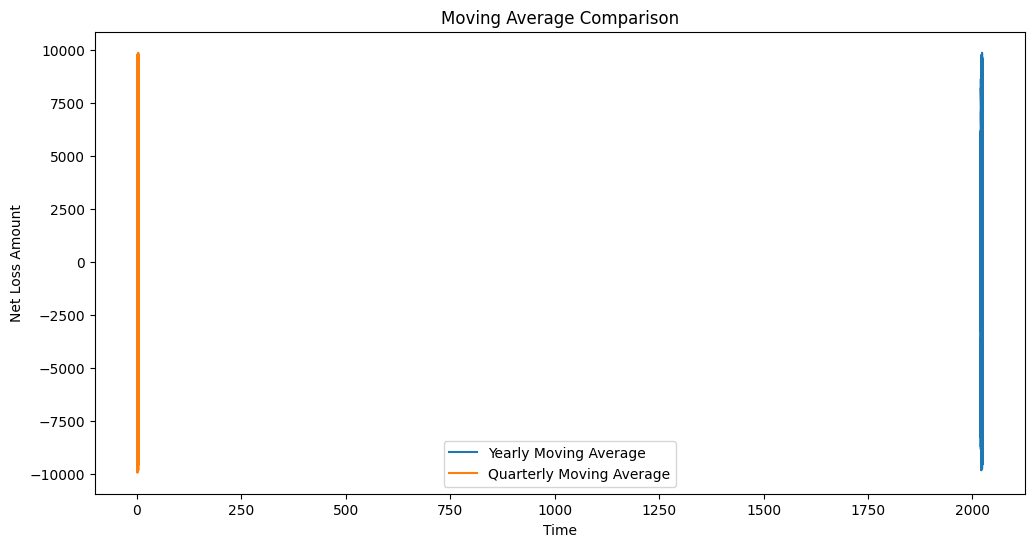

In [13]:
# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Yearly Moving Avg (Net Loss)'], label='Yearly Moving Average')
plt.plot(df['Quarter'], df['Quarterly Moving Avg (Net Loss)'], label='Quarterly Moving Average')
plt.title('Moving Average Comparison')
plt.xlabel('Time')
plt.ylabel('Net Loss Amount')
plt.legend()
plt.show()


In [14]:
# Bar Chart
metrics = ['MSE', 'RMSE']
values = [mse_yearly, rmse_yearly, mse_quarterly, rmse_quarterly]
labels = ['Yearly MSE', 'Yearly RMSE', 'Quarterly MSE', 'Quarterly RMSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'blue', 'green', 'green'])
plt.title('MSE and RMSE Comparison')
plt.ylabel('Error')
plt.show()


NameError: name 'mse_yearly' is not defined

In [ ]:
# Hit Rate Comparison
hit_rates = [yearly_hit_rate, quarterly_hit_rate]
categories = ['Yearly', 'Quarterly']

plt.figure(figsize=(8, 5))
plt.bar(categories, hit_rates, color=['blue', 'green'])
plt.title('Hit Rate Comparison')
plt.ylabel('Hit Rate')
plt.ylim(0, 1)
plt.show()


In [ ]:
3. Interpretation
Moving Average: If quarterly data shows more detailed patterns (e.g., seasonal spikes), it may suggest finer control or monitoring is needed.
MSE/RMSE: Lower RMSE values in quarterly analysis indicate better prediction accuracy.
Hit Rate: Higher hit rates for quarterly analysis indicate better sensitivity to anomalies.
Actionable Insight:

Recommend quarterly analysis for operational strategies like anomaly detection, forecasting, and detailed monitoring.
Use yearly analysis for high-level summaries and long-term planning.
Let me know if you need further clarifications!